# 信用情報の分析
Kaggleの Home Credit Default Risk コンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行う。\
Week4では機械学習手法を用いて学習・推定を行います。その準備としてWeek3でデータ探索（EDA）を行う。

Home Credit Default Risk | Kaggle \
https://www.kaggle.com/c/home-credit-default-risk





## 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートする。

・Home Creditはどのような企業？ \
・このコンペティションでは何を予測する？ \
・それを予測することで企業が得られるメリットは何？


In [1]:
print("・Home Creditはどのような企業？")
print("　銀行口座を持たない人々に、前向きで安全な借入体験を提供することで、すべての人々の金融サービス利用に貢献している企業")
print("")
print("・このコンペティションでは何を予測する？")
print("　過去のローン申請データを使って、申請者がローンを返済できるかどうかを予測する")
print("")
print("・それを予測することで企業が得られるメリットは何？")
print("　企業は、返済能力のある顧客が拒絶することなく、必要な元金、満期、返済カレンダーで融資を提供できる")


・Home Creditはどのような企業？
　銀行口座を持たない人々に、前向きで安全な借入体験を提供することで、すべての人々の金融サービス利用に貢献している企業

・このコンペティションでは何を予測する？
　過去のローン申請データを使って、申請者がローンを返済できるかどうかを予測する

・それを予測することで企業が得られるメリットは何？
　企業は、返済能力のある顧客が拒絶することなく、必要な元金、満期、返済カレンダーで融資を提供できる


### データセットの準備
分析対象のデータセットはコンペティションのDataページからapplication_train.csvをダウンロードして使用。\
また同ページ内にあるHomeCredit_columns_description.csvは、データセットに関する説明となる。\
Dataページ内の他のcsvファイルはこの課題では扱いません。

## 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行う。

・.head()、.info()、describe()などを使う\
・欠損値の有無を見る\
・クラスの割合がわかるグラフを描く

それぞれ結果に対する説明や考察も行う。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


df = pd.read_csv('application_train.csv')
display(df)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# .head()を使う
display(df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#.info()を使う
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


None

In [5]:
#.describe()を使う
display(df.describe())

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


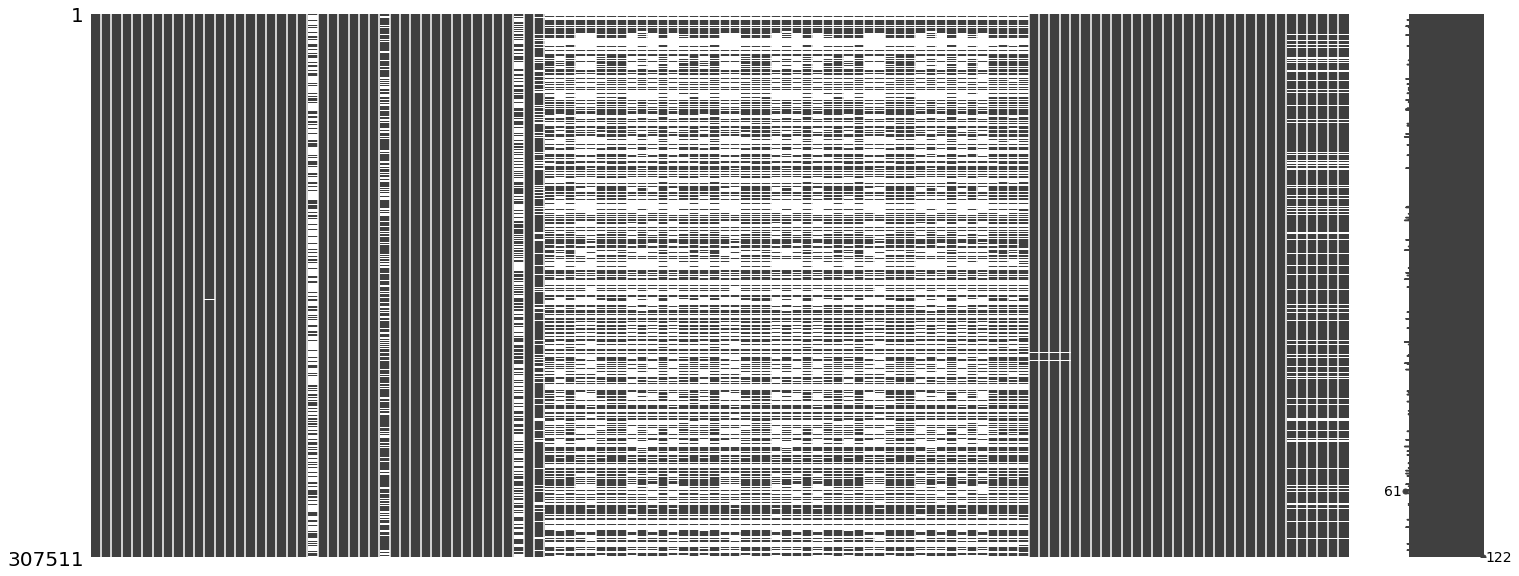

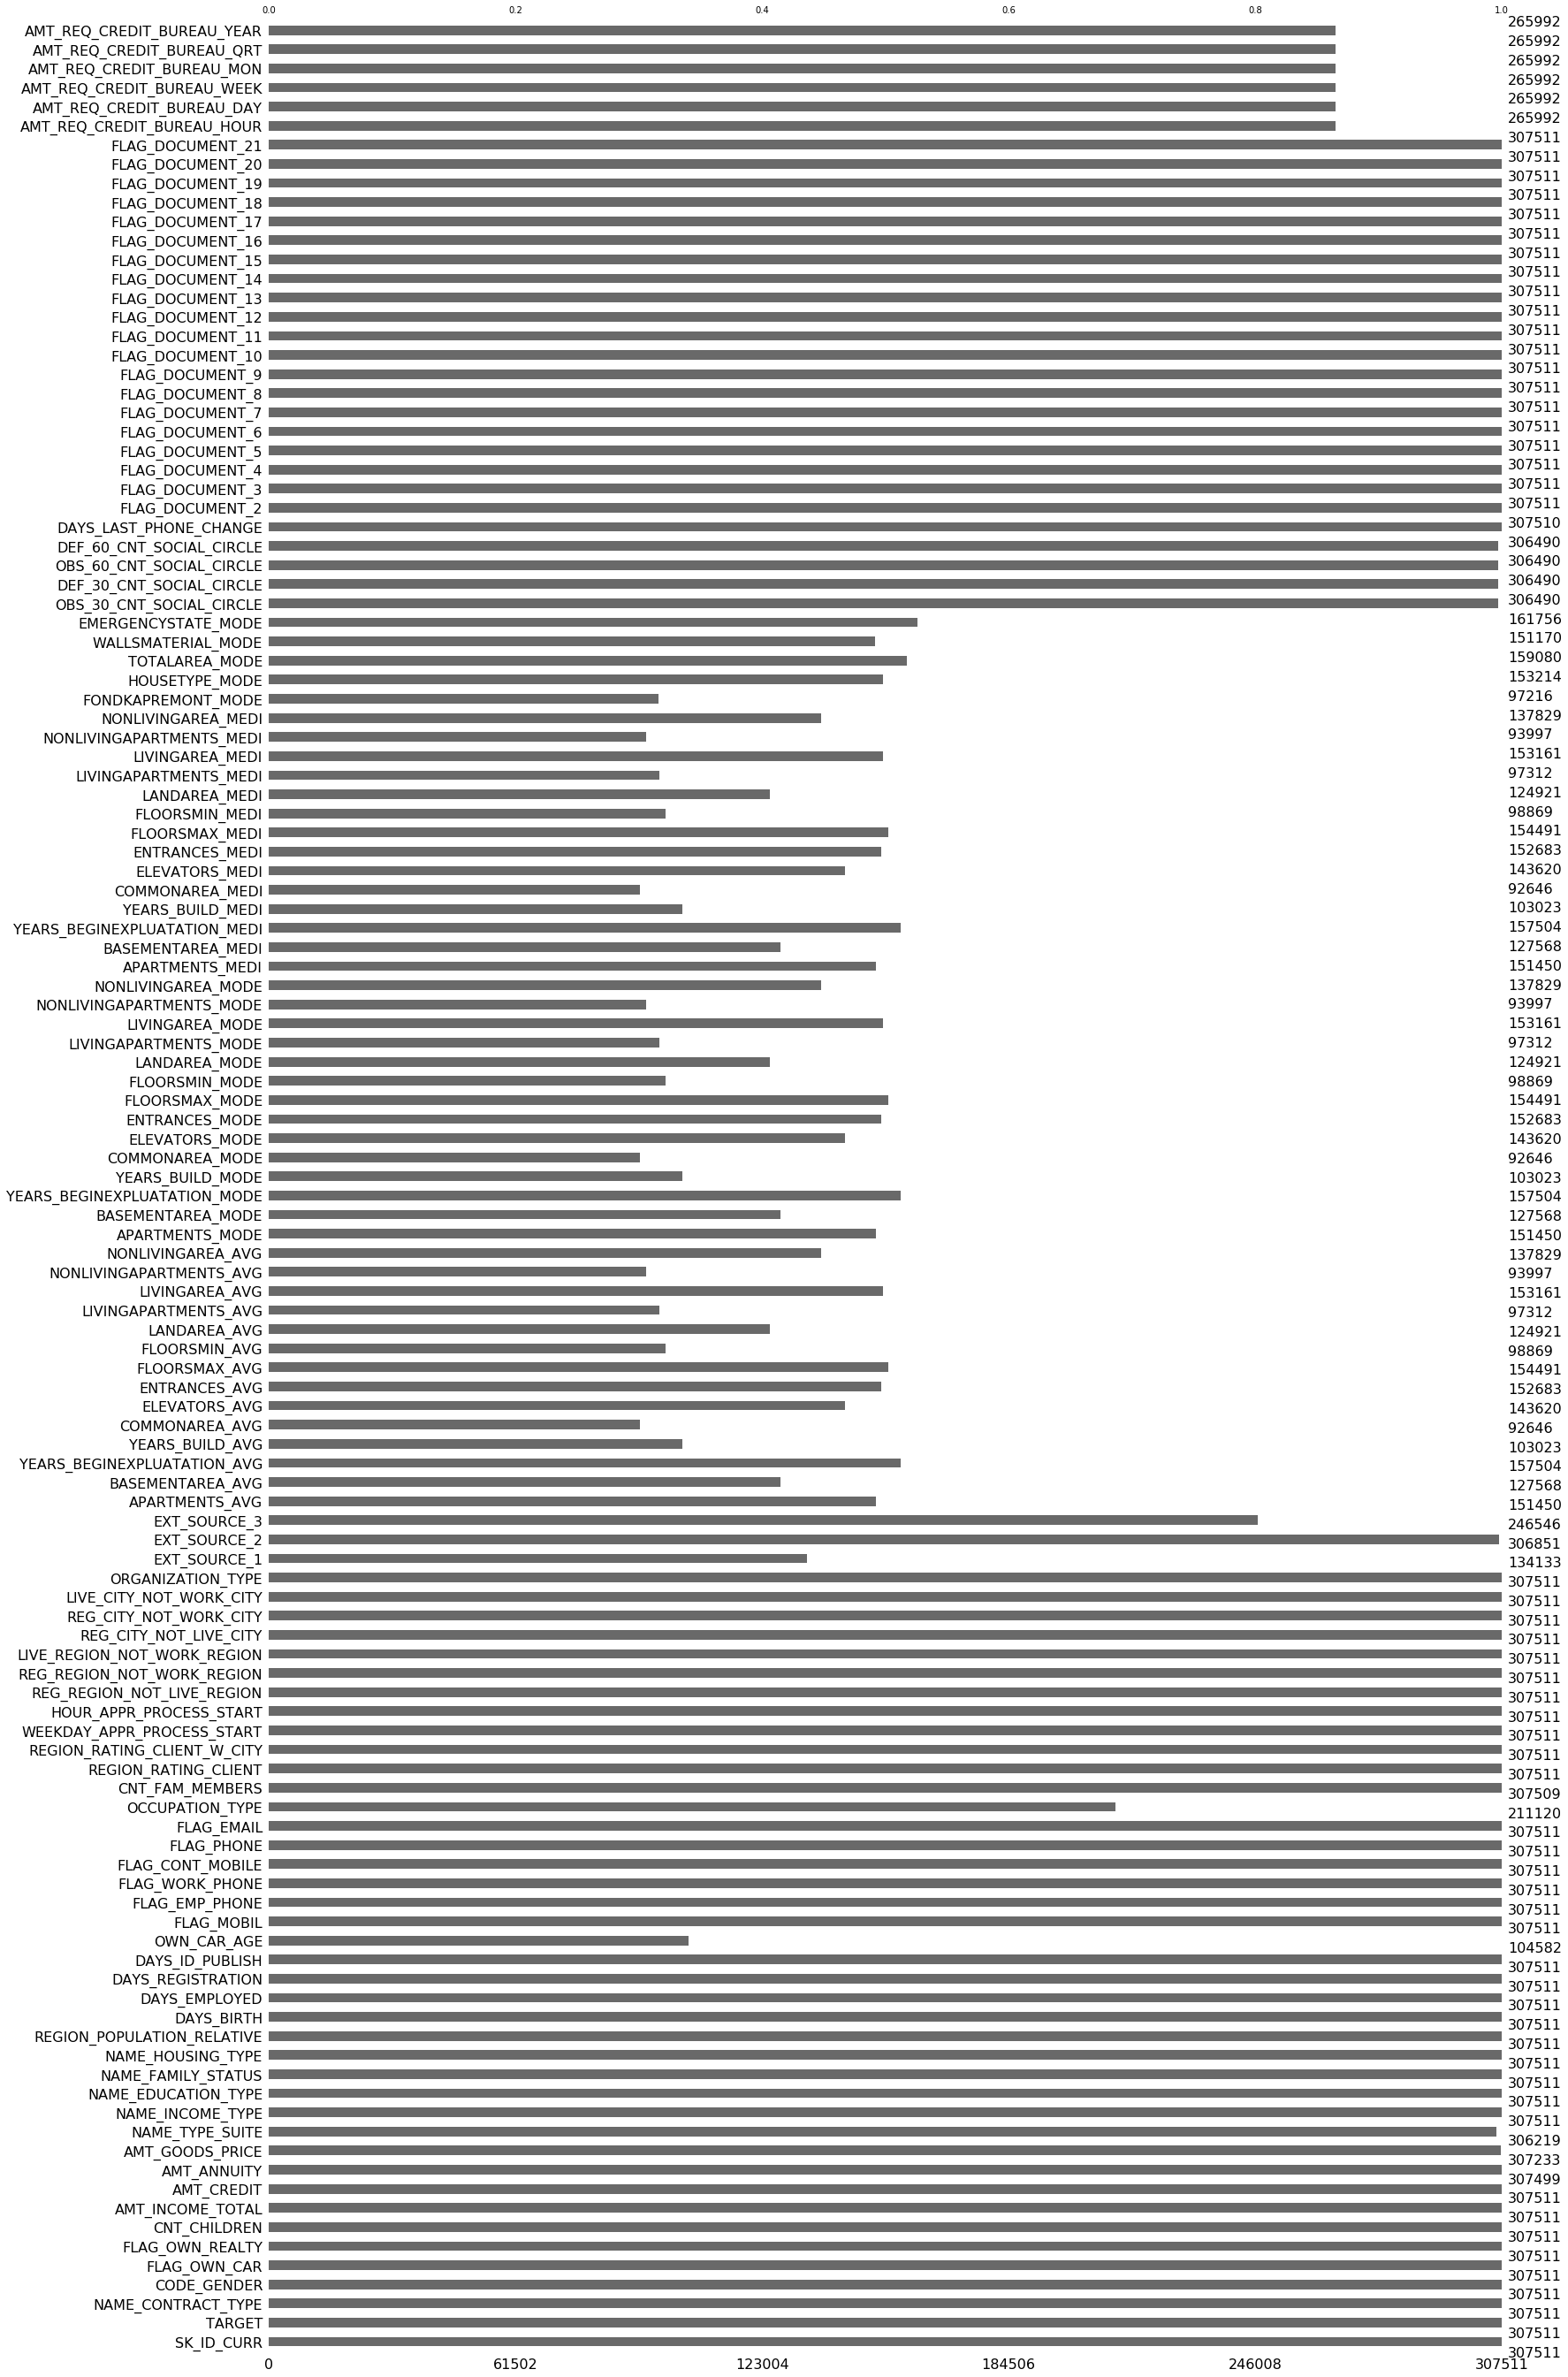

In [6]:
#欠損値の有無を見る
display(msno.matrix(df))
plt.show()
display(msno.bar(df))
plt.show()

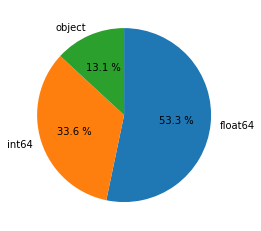

float64    65
int64      41
object     16
dtype: int64

In [7]:
#クラスの割合がわかるグラフを描く
label = ["float64","int64","object"]
plt.pie(df.dtypes.value_counts(),labels=label,counterclock=False, startangle=90, autopct="%1.1f %%")
plt.show()
display(df.dtypes.value_counts())

# 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定する。


In [8]:
#課題・疑問を設定する。
print("1. 目的変数の理解")
print("1-1. 今回の目的変数は何か？")
print("1-2. どのような特徴があるか？")
print("1-3. どのように分布しているか？")
print("")
print("2. 特徴量の理解")
print("2-1. データの無い部分はどうするか？")
print("2-2. 相関し難いデータはあるか？")
print("2-3. おかしなデータはあるか？")
print("")
print("3. データの分析")
print("3-1. 目的変数と高い相関を持つ特徴量は何か？")


1. 目的変数の理解
1-1. 今回の目的変数は何か？
1-2. どのような特徴があるか？
1-3. どのように分布しているか？

2. 特徴量の理解
2-1. データの無い部分はどうするか？
2-2. 相関し難いデータはあるか？
2-3. おかしなデータはあるか？

3. データの分析
3-1. 目的変数と高い相関を持つ特徴量は何か？



# 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進める。\
探索で使用する表やグラフを、考察と共に 5個以上 作成する。\
探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

In [9]:
#1. 目的変数の理解
#1-1. 今回の目的変数は何か？
#WEBページを参照した所見
print("今回の目的変数は、1行目の「TARGET」。")
print("「0」か「1」のデータを保有する。")
print("「0」はローンが期限内に返済されたことを示す。")
print("「1」は顧客が支払い困難であったことを示す。")


今回の目的変数は、1行目の「TARGET」。
「0」か「1」のデータを保有する。
「0」はローンが期限内に返済されたことを示す。
「1」は顧客が支払い困難であったことを示す。


TARGETのデータ数： 307511


0    282686
1     24825
Name: TARGET, dtype: int64

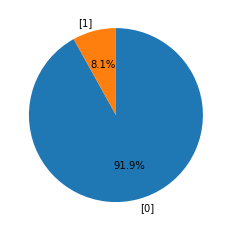

TARGETのデータ数は307,511。
内訳は282,686の91.9%が[0]で、24,825の8.1%が[1]。
つまり、全データの内、ローンを期限内に返済した顧客は90%を超える。


In [10]:
#1-2. どのような特徴があるか？
#データ数を確認する
print("TARGETのデータ数：",df['TARGET'].shape[0])

#データの内訳を確認する
display(df['TARGET'].value_counts())

#データの内訳の割合を確認する
label=["[0]","[1]"]
plt.pie(df['TARGET'].value_counts(),labels=label,counterclock=False, startangle=90,autopct='%1.1f%%')
plt.show()

#所見
print("TARGETのデータ数は307,511。")
print("内訳は282,686の91.9%が[0]で、24,825の8.1%が[1]。")
print("つまり、全データの内、ローンを期限内に返済した顧客は90%を超える。")

目的変数は正規分布の形の方が機械学習し易くlogを使うと正規分布になり易い旨学んだが、
今回の目的変数は、ローンを返済したか、していないかの二択になるため、偏りが発生している。


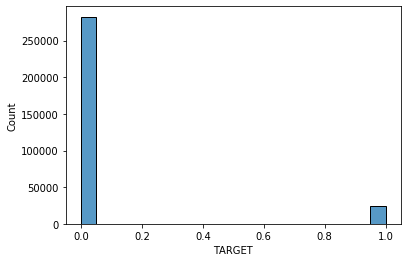

In [11]:
#どのように分布しているか？
display(sns.histplot(df['TARGET']))

#所見
print("目的変数は正規分布の形の方が機械学習し易くlogを使うと正規分布になり易い旨学んだが、")
print("今回の目的変数は、ローンを返済したか、していないかの二択になるため、偏りが発生している。")

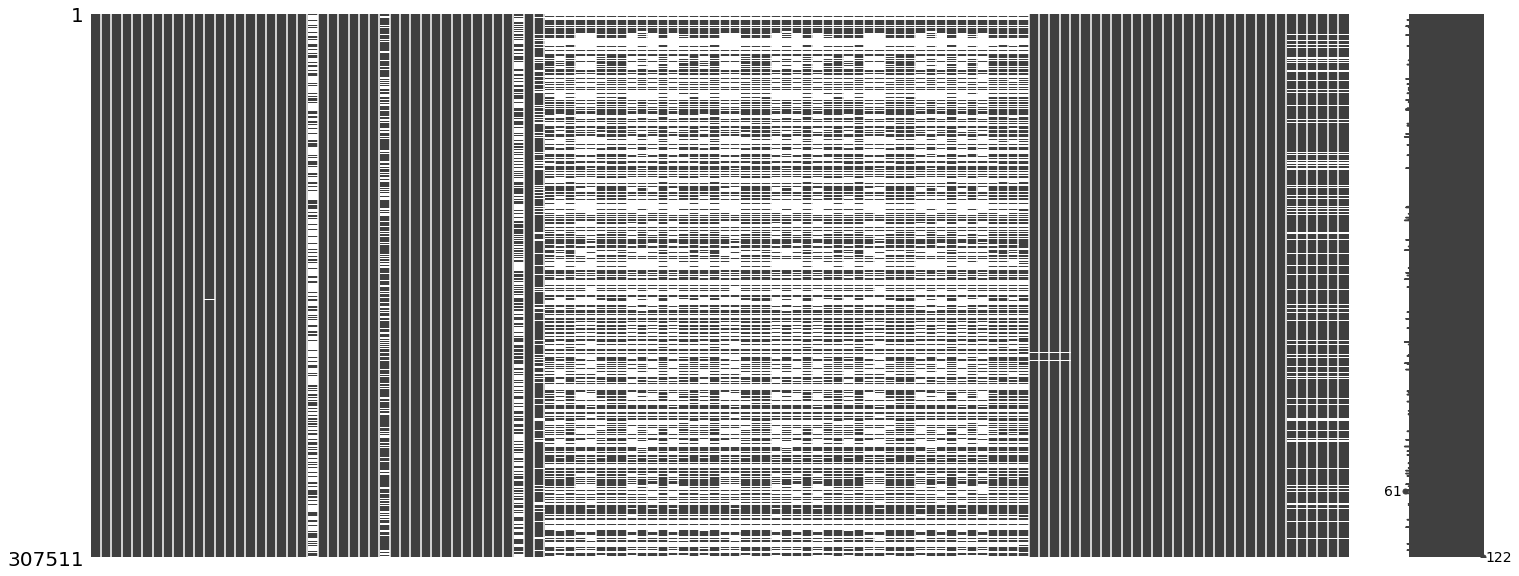

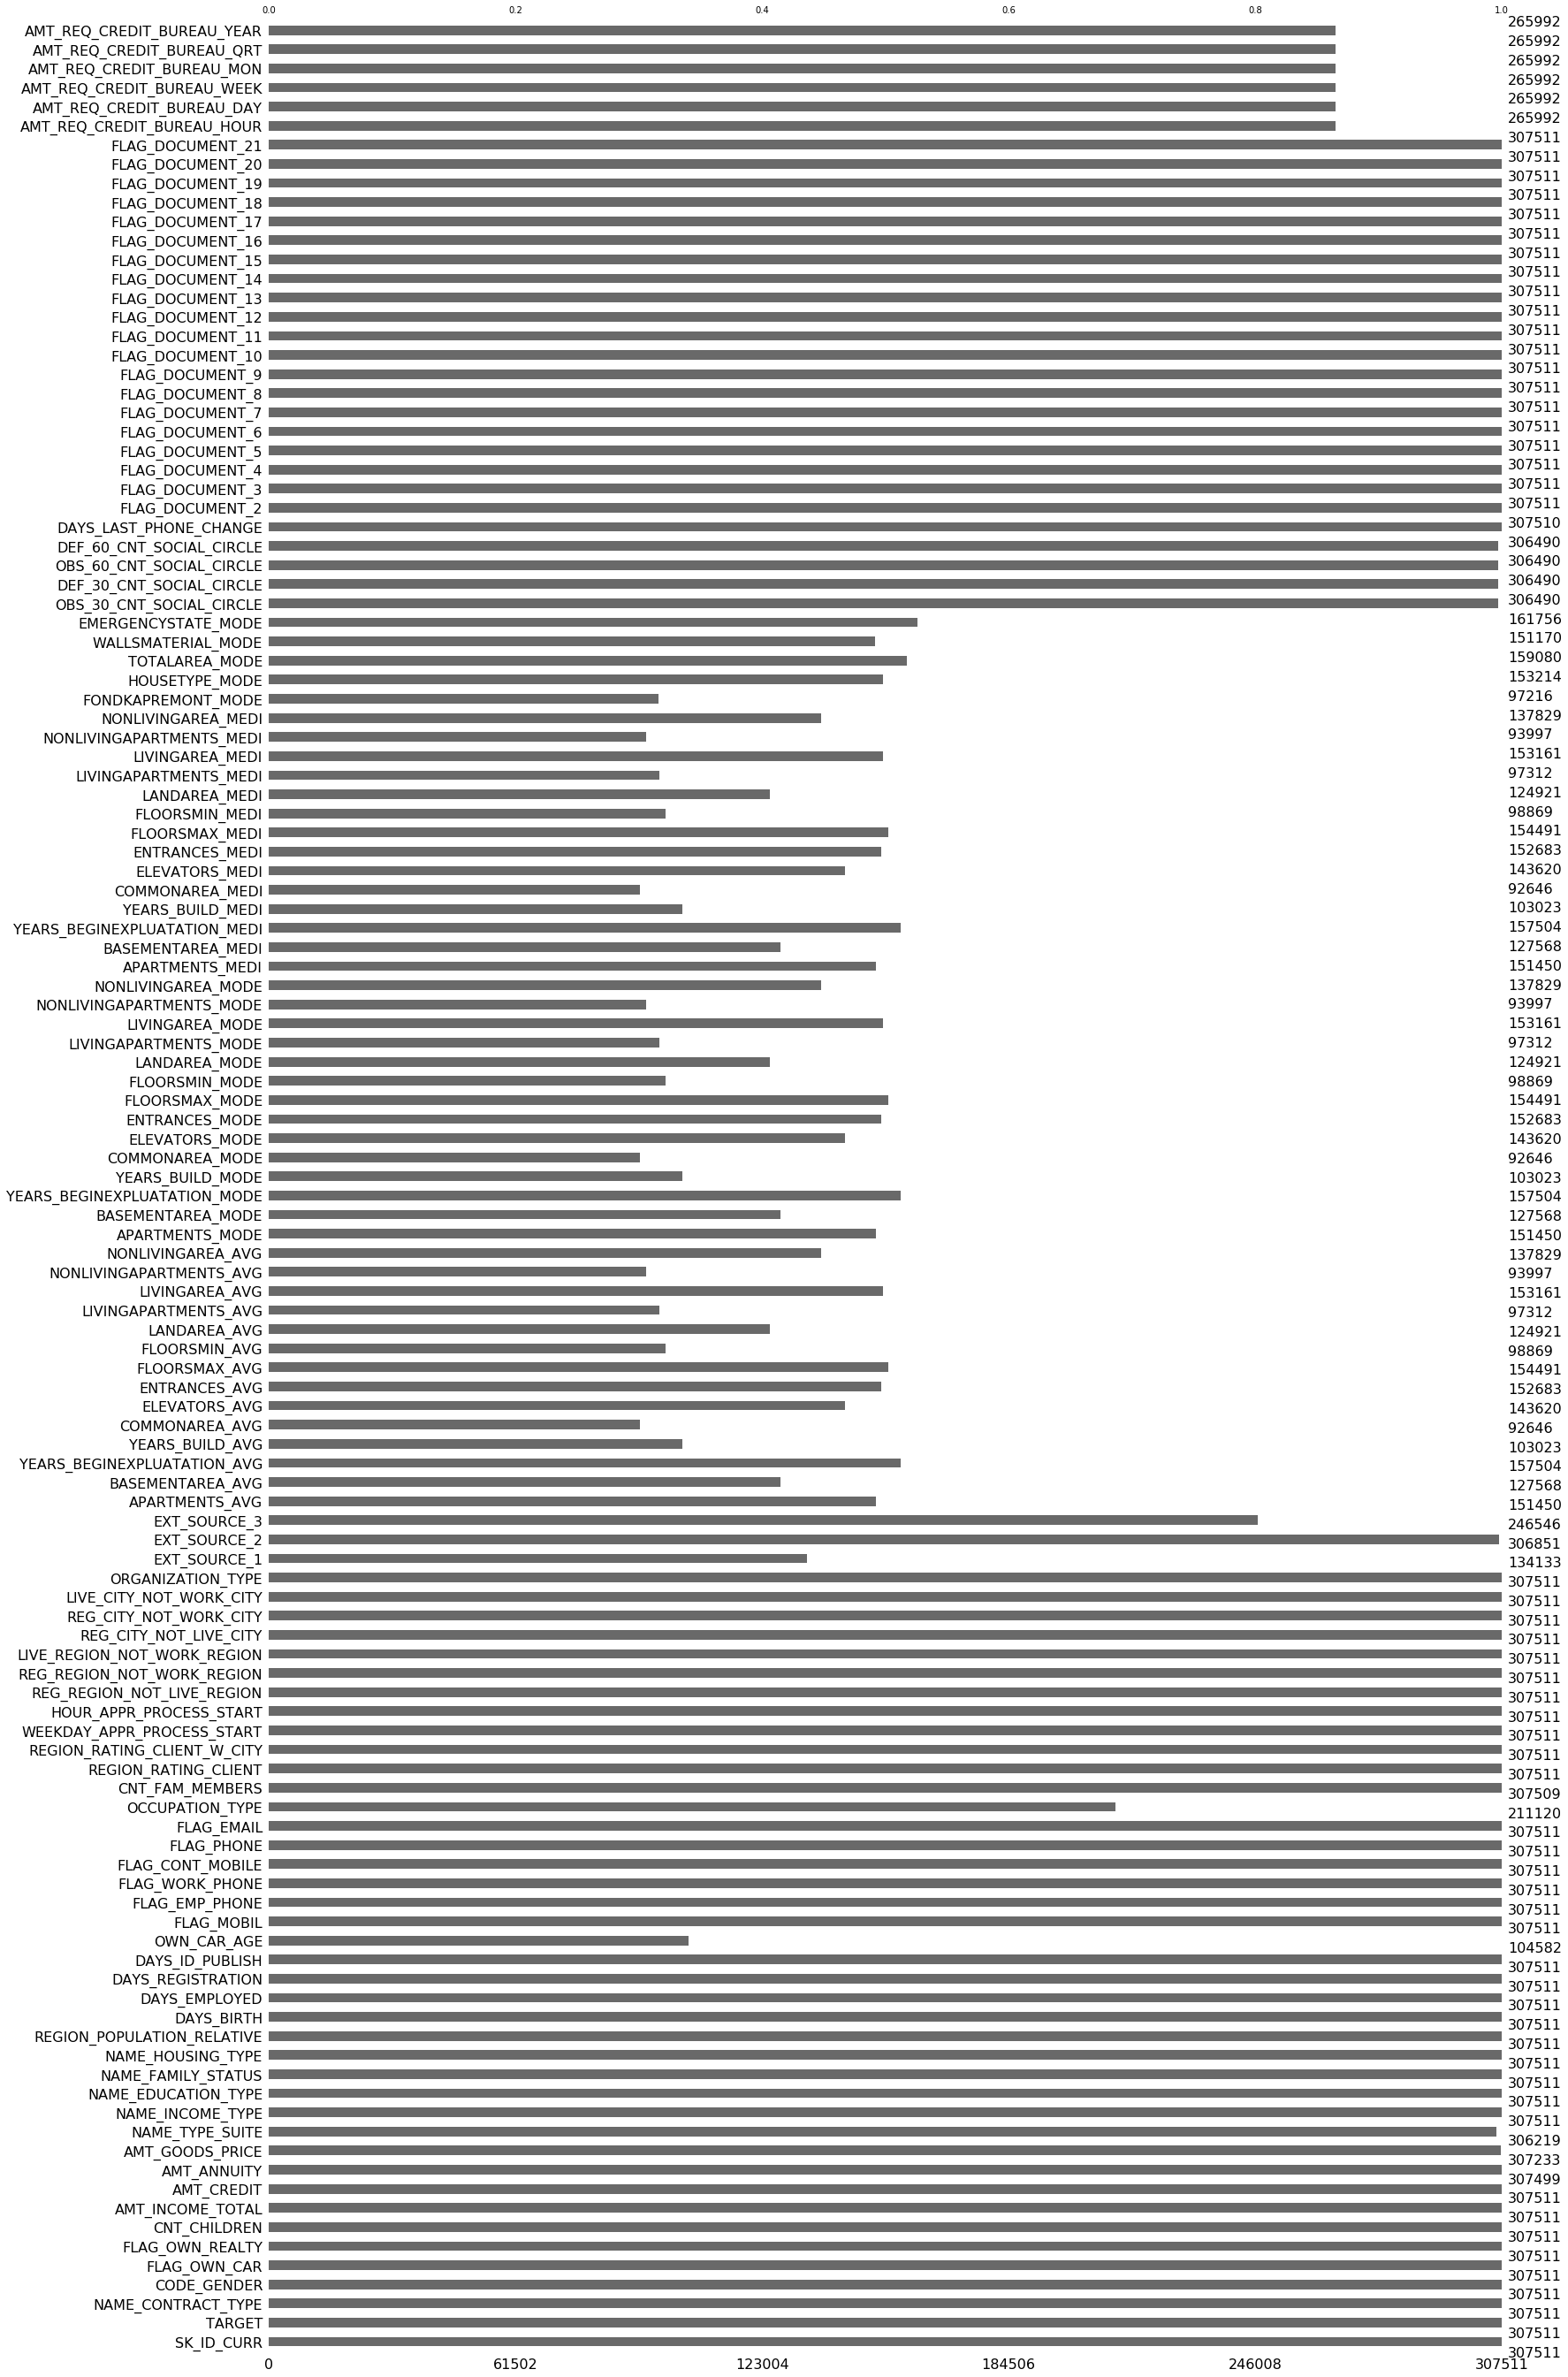

In [12]:
#2. 特徴量の理解
#2-1. データの無い部分はどうするか？
#欠損値の有無を見る
display(msno.matrix(df))
plt.show()
display(msno.bar(df))
plt.show()

#課題「住宅情報の分析」と同様に以下の通りデータを削除する
#・5つ以上欠損値がある特徴量（列）は削除する。
#・5つ以上欠損値がある特徴量を削除したデータから、欠損値があるサンプル（行）は削除する。

In [13]:
# 5つ以上欠損値がある特徴量（列）は削除する。
missing = df.isnull().sum(axis=0) #各列の欠損値を合計
missing5 = missing[missing>=5] #5つ以上欠損値がある列を抽出
df.drop(missing5.index,axis=1, inplace=True) #対象列を削除
display(df.isnull().sum(axis=0))

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION

In [14]:
# 5つ以上欠損値がある特徴量を削除したデータから、欠損値があるサンプル（行）は削除する。
df.dropna(how='any',inplace=True)
display(df.isnull().sum(axis=0))

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION

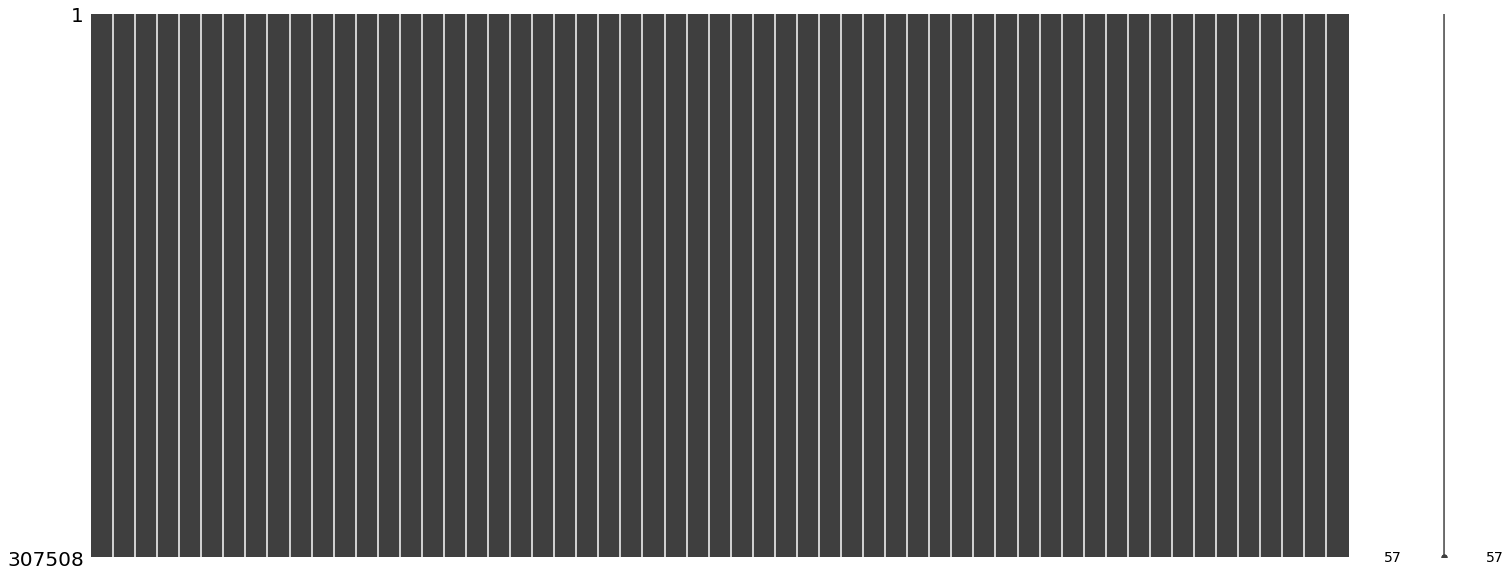

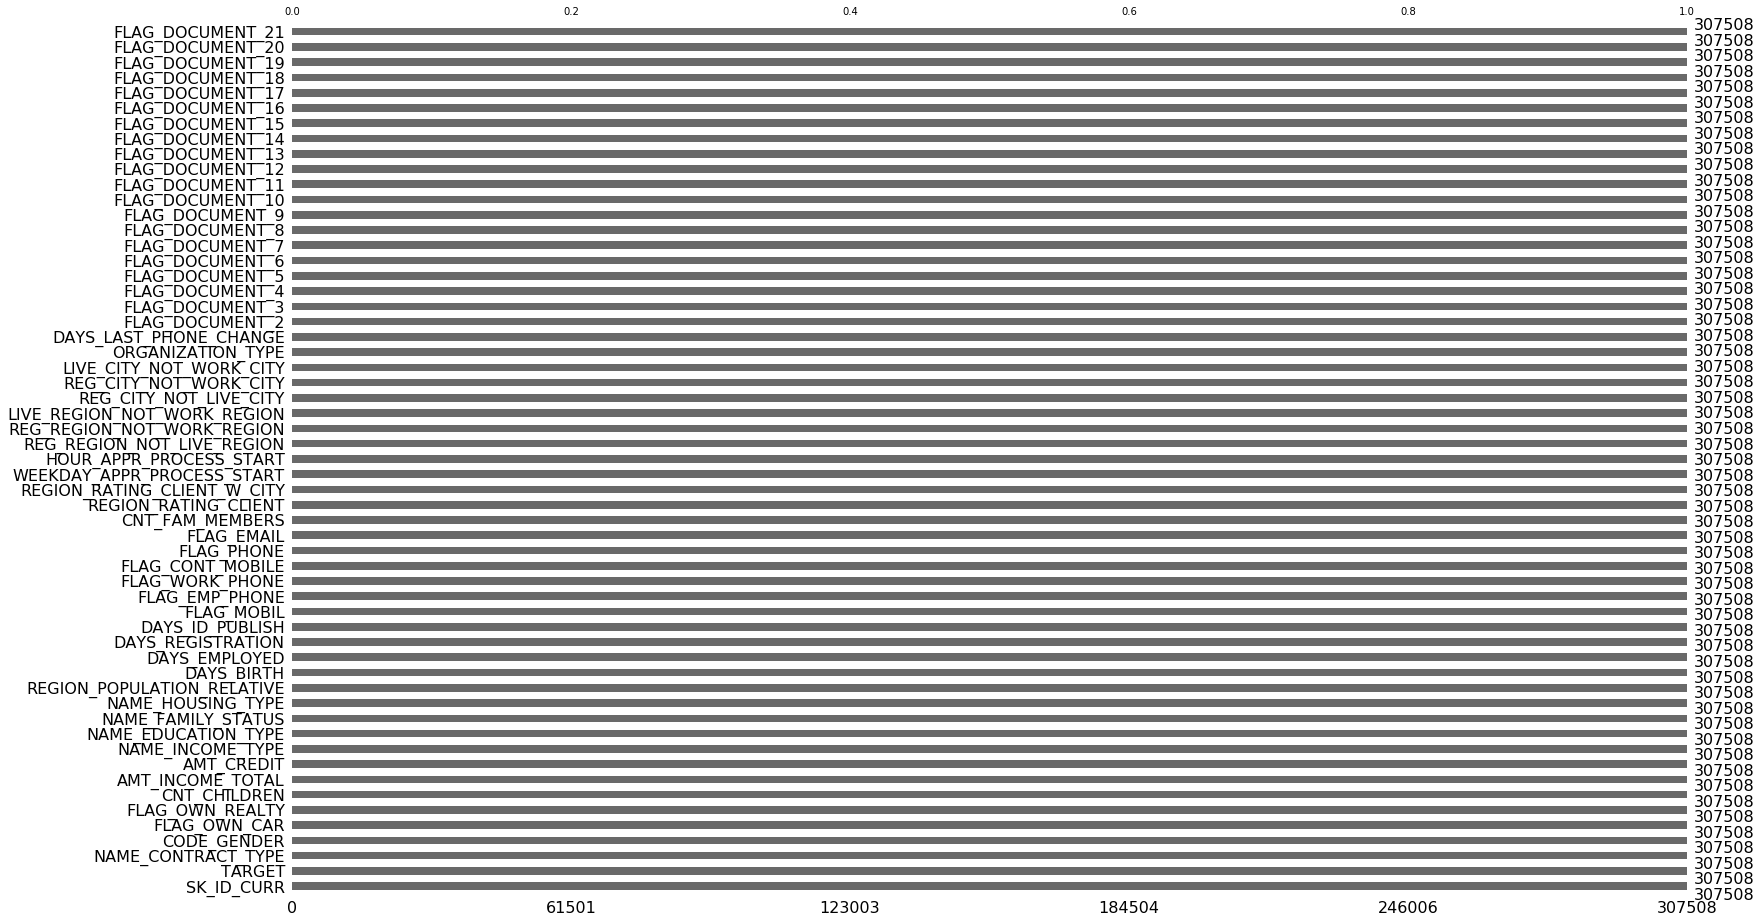

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,Working,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,Pensioner,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,Working,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,Commercial associate,...,0,0,0,0,0,0,0,0,0,0


欠損値の取り扱いは、課題「住宅情報の分析」と同様に以下の通りとした。
・5つ以上欠損値がある特徴量（列）は削除する。
・5つ以上欠損値がある特徴量を削除したデータから、欠損値があるサンプル（行）は削除する。
結果、307511 rows × 122 columnsが、307508 rows × 57 columnsとなった。


In [15]:
# 欠損値がなくなったことを確認
display(msno.matrix(df)) 
plt.show()
display(msno.bar(df))
plt.show()
display(df)

#所見
print("欠損値の取り扱いは、課題「住宅情報の分析」と同様に以下の通りとした。")
print("・5つ以上欠損値がある特徴量（列）は削除する。")
print("・5つ以上欠損値がある特徴量を削除したデータから、欠損値があるサンプル（行）は削除する。")
print("結果、307511 rows × 122 columnsが、307508 rows × 57 columnsとなった。")

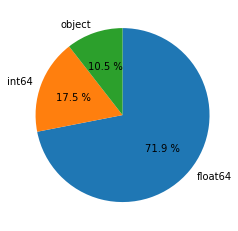

int64      41
object     10
float64     6
dtype: int64

データがobjectになっている列は相関が難しいので、intに置き換える。


In [16]:
# 2-2. 相関し難いデータはあるか？
# 現時点でのクラス情報をみる。
label = ["float64","int64","object"]
plt.pie(df.dtypes.value_counts(),labels=label,counterclock=False, startangle=90, autopct="%1.1f %%")
plt.show()
display(df.dtypes.value_counts())

#所見
print("データがobjectになっている列は相関が難しいので、intに置き換える。")

In [17]:
# データがojectの列名を出力する。
display(df.select_dtypes('object').apply(pd.Series.nunique, axis = 0))


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [18]:
#データがobjectの列のデータを見る。
display(df.select_dtypes('object'))

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,State servant,Higher education,Married,House / apartment,MONDAY,School
2,Revolving loans,M,Y,Y,Working,Secondary / secondary special,Single / not married,House / apartment,MONDAY,Government
3,Cash loans,F,N,Y,Working,Secondary / secondary special,Civil marriage,House / apartment,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Working,Secondary / secondary special,Single / not married,House / apartment,THURSDAY,Religion
...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Working,Secondary / secondary special,Separated,With parents,THURSDAY,Services
307507,Cash loans,F,N,Y,Pensioner,Secondary / secondary special,Widow,House / apartment,MONDAY,XNA
307508,Cash loans,F,N,Y,Working,Higher education,Separated,House / apartment,THURSDAY,School
307509,Cash loans,F,N,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,WEDNESDAY,Business Entity Type 1


In [19]:
# one-hot encodingの要領でobjectのデータをintに変える。
df = pd.get_dummies(df)

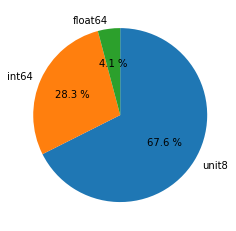

uint8      98
int64      41
float64     6
dtype: int64

全てのデータについて相関しやすくなった。


In [20]:
# 現時点のクラスの情報をみる。
label = ["unit8","int64","float64"]
plt.pie(df.dtypes.value_counts(),labels=label,counterclock=False, startangle=90, autopct="%1.1f %%")
plt.show()
display(df.dtypes.value_counts())

# 所見
print("全てのデータについて相関しやすくなった。")

In [21]:
# 2-3. おかしなデータはあるか？
# .describeで中身をみる。
display(df.describe())

print("DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGEがマイナスになるのがおかしそう。")
print("ANT_INCOME_TOTALのMAXの数字がおかしそう。")

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
count,307508.000000,307508.00000,307508.000000,3.075080e+05,3.075080e+05,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,...,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000
mean,278181.332947,0.08073,0.417056,1.687970e+05,5.990268e+05,0.020868,-16037.041560,63815.673956,-4986.137584,-2994.208382,...,0.000208,0.000159,0.002052,0.025466,0.000654,0.007167,0.003860,0.017554,0.004315,0.180073
std,102789.982905,0.27242,0.722124,2.371237e+05,4.024923e+05,0.013831,4363.980429,141276.312548,3522.896819,1509.449226,...,0.014425,0.012622,0.045252,0.157536,0.025558,0.084356,0.062009,0.131324,0.065549,0.384249
min,100002.000000,0.00000,0.000000,2.565000e+04,4.500000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189146.750000,0.00000,0.000000,1.125000e+05,2.700000e+05,0.010006,-19682.000000,-2760.000000,-7480.000000,-4299.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.500000,0.00000,0.000000,1.471500e+05,5.135310e+05,0.018850,-15750.000000,-1214.000000,-4504.000000,-3254.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367143.250000,0.00000,1.000000,2.025000e+05,8.086500e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456255.000000,1.00000,19.000000,1.170000e+08,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGEがマイナスになるのがおかしそう。
ANT_INCOME_TOTALのMAXの数字がおかしそう。


,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0


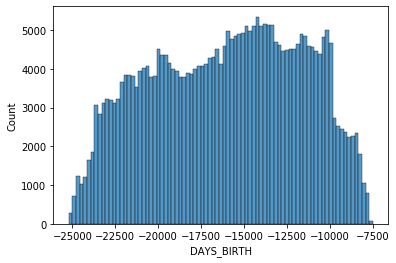

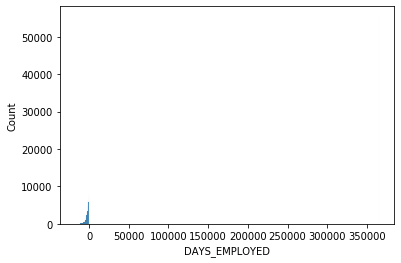

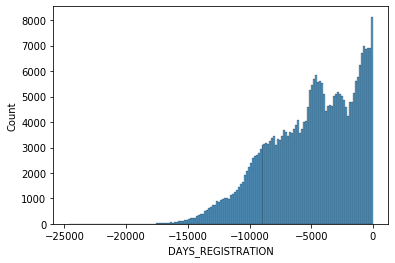

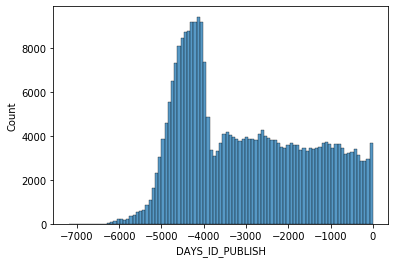

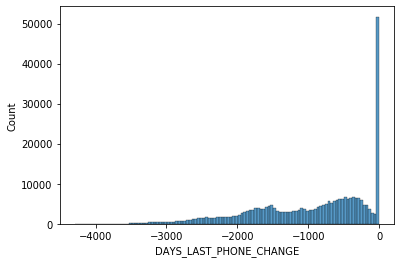

説明書にはtime only relative to the applicationとあるので、マイナスがついているだけのよう。
しかし、DAYS_EMPLOYEDのMAXがおかしそう。


In [22]:
# DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGEをみていく
display(df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].head())

display(sns.histplot(df['DAYS_BIRTH']))
plt.show()
display(sns.histplot(df['DAYS_EMPLOYED']))
plt.show()
display(sns.histplot(df['DAYS_REGISTRATION']))
plt.show()
display(sns.histplot(df['DAYS_ID_PUBLISH']))
plt.show()
display(sns.histplot(df['DAYS_LAST_PHONE_CHANGE']))
plt.show()

print("説明書にはtime only relative to the applicationとあるので、マイナスがついているだけのよう。")
print("しかし、DAYS_EMPLOYEDのMAXがおかしそう。")


In [23]:
corrmat10 = df.nlargest(100, 'DAYS_EMPLOYED')
display(corrmat10)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
8,100011,0,0,112500.000,1019610.0,0.018634,-20099,365243,-7427.0,-3514,...,0,0,0,0,0,0,0,0,0,1
11,100015,0,0,38419.155,148365.0,0.015221,-20417,365243,-5246.0,-2512,...,0,0,0,0,0,0,0,0,0,1
23,100027,0,0,83250.000,239850.0,0.006296,-24827,365243,-9012.0,-3684,...,0,0,0,0,0,0,0,0,0,1
38,100045,0,0,99000.000,247275.0,0.006207,-23920,365243,-9817.0,-4969,...,0,0,0,0,0,0,0,0,0,1
43,100050,0,0,108000.000,746280.0,0.010966,-23548,365243,-5745.0,-4576,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,100675,0,0,202500.000,1125000.0,0.008068,-22503,365243,-442.0,-4974,...,0,0,0,0,0,0,0,0,0,1
602,100689,0,0,63000.000,528633.0,0.031329,-21752,365243,-9863.0,-4208,...,0,0,0,0,0,0,0,0,0,1
608,100695,0,0,135000.000,1219500.0,0.019101,-17426,365243,-6353.0,-972,...,0,0,0,0,0,0,0,0,0,1
610,100697,0,0,225000.000,495985.5,0.072508,-20648,365243,-4893.0,-3983,...,0,0,0,0,0,0,0,0,0,1


count    307508.000000
mean        174.837463
std         387.058391
min         -49.073973
25%          -7.561644
50%          -3.326027
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

1000年を超えるのでおかしそう。
タイプミスとして該当行を削除する。


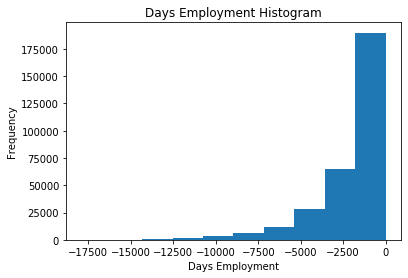

In [24]:
# DAYS_EMPLOYEDを抽出する。
display((df['DAYS_EMPLOYED']/365).describe())

print("1000年を超えるのでおかしそう。")
print("タイプミスとして該当行を削除する。")

# DAYS_EMPLOYEDのおかしい数値を0にする。
df['DAYS_EMPLOYED'].replace({365243: 0}, inplace = True)

df['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [25]:
# DAYS_EMPLOYEDを抽出するとおかしい値が消えた。
display((df['DAYS_EMPLOYED']/365).describe())

count    307508.000000
mean         -5.355786
std           6.320755
min         -49.073973
25%          -7.561644
50%          -3.326027
75%          -0.791781
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

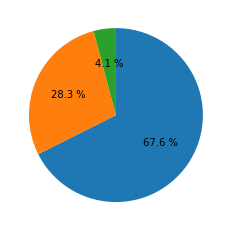

uint8      98
int64      41
float64     6
dtype: int64

In [26]:
# 現時点のクラスの情報をみる。
label = ["unit8","int64","float64"]
plt.pie(df.dtypes.value_counts(),counterclock=False, startangle=90, autopct="%1.1f %%")
plt.show()
display(df.dtypes.value_counts())

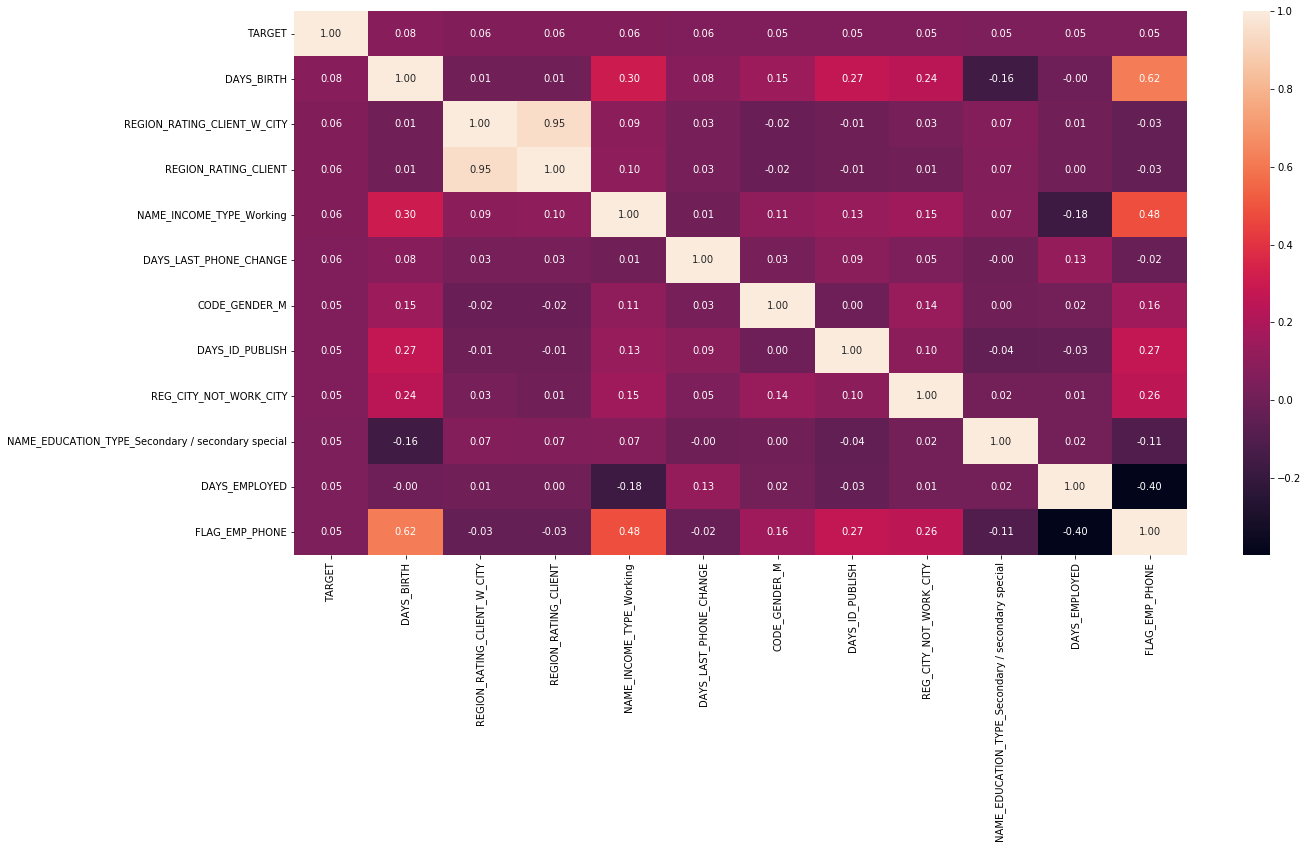

In [27]:
#3. データの分析
#3-1. 目的変数と高い相関を持つ特徴量は何か？
#相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
corrmat = df.corr()
cols = corrmat.nlargest(12, 'TARGET')['TARGET'].index
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(20, 10))
sns.heatmap(cm,annot=True,fmt="1.2f",yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [28]:
print("TARGETと一番相関の高いものはDAYS_BIRTHであることが分かった")

TARGETと一番相関の高いものはDAYS_BIRTHであることが分かった


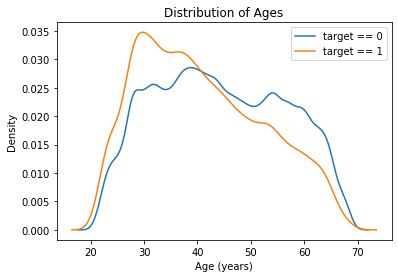

In [34]:
# TARGETと年齢の関係をグラフにする。
sns.kdeplot(df.loc[df['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0')
sns.kdeplot(df.loc[df['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1')

plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')
plt.legend()
plt.show()

In [35]:
print("ローン返済は若いほど（30代程度）滞りやすいことがわかった。")

ローン返済は若いほど（30代程度）滞りやすいことがわかった。
